In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest

In [3]:
df = pd.read_excel('coffee_shop_sales_dataset.xlsx')
df.head(3)

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Pastry_Sales,Sandwich_Sales,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,45,17,411.11,160,135.3,42.10,200,537.40,-126.28,6.3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,16,7,205.12,320,58.7,57.80,200,636.50,-431.38,7.3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,25,12,459.23,400,112.4,42.33,200,754.73,-295.51,7.6


In [4]:
# Step 3: Pick Features (What affects revenue?)
# Let's choose simple features to predict revenue
features = ['Temperature_C', 'Is_Weekend', 'Is_Raining', 
            'Num_Customers', 'Staff_Count', 'Promotion_Active']

X = df[features]  # What we use to predict
y = df['Daily_Revenue']  # What we want to predict

print("✅ Features selected!")
print("Features (X):", features)
print("Target (y): Daily_Revenue")

✅ Features selected!
Features (X): ['Temperature_C', 'Is_Weekend', 'Is_Raining', 'Num_Customers', 'Staff_Count', 'Promotion_Active']
Target (y): Daily_Revenue


0      411.11
1      205.12
2      459.23
3      198.49
4      201.65
        ...  
360    247.86
361    320.52
362    362.91
363    488.92
364    478.11
Name: Daily_Revenue, Length: 365, dtype: float64

In [5]:
# Step 4: Split Data (Train & Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"📚 Training set: {X_train.shape[0]} days")
print(f"🧪 Testing set: {X_test.shape[0]} days")

📚 Training set: 292 days
🧪 Testing set: 73 days


In [20]:
# Step 6: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained!")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")



✅ Model trained!
Coefficients: [  0.40316172 -55.06751555   1.61609738   7.21222188  31.30395467
 -27.66584783]
Intercept: -80.63


In [7]:
y_pred = model.predict(X_test)
y_pred

array([400.80705418, 275.33652673, 172.35321591, 291.91159832,
       296.04607403, 297.81998562, 509.20151787, 419.43393452,
       334.0467327 , 520.48912365, 133.55497978, 262.56427716,
       230.00707066, 318.0996754 , 281.06142322, 282.32438333,
       408.15729544, 190.36142603, 396.07677526, 217.35653849,
        57.15909308, 290.89764679, 379.38913694, 167.59667645,
       366.07530233, 357.66844543, 292.99408776, 347.51308601,
       379.78468577, 344.48937307, 241.53657348, 337.34813222,
       405.40735698, 362.36636809, 333.42931863, 189.15270974,
       324.30775071, 487.18792541, 347.06467682, 254.10724219,
       332.19203514, 134.92135665, 258.2873124 , 303.45987677,
       359.86753429, 244.76263616, 368.10580748, 263.90518801,
       275.43102976, 244.15290532, 228.23753207, 273.19992322,
       175.61445289, 313.17937119, 316.72359026, 355.88045258,
       285.89859504, 283.03599316, 202.36689944, 459.3207073 ,
       278.83090063, 276.7433734 , 407.61174134, 217.96

In [8]:
# Step 8: Evaluate Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R² Score: {r2:.2f} (1.0 is perfect)")



📊 Model Evaluation:
Mean Squared Error (MSE): $3163.72
Mean Absolute Error (MAE): $43.01
R² Score: 0.73 (1.0 is perfect)
🎯 Good prediction!


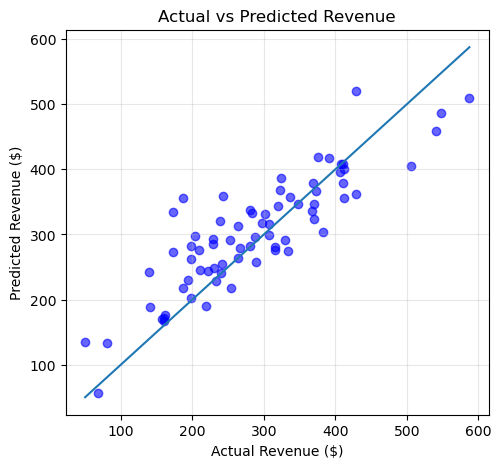

In [9]:
# Step 9: Visualize Results
plt.figure(figsize=(12, 5))

# Plot 1: Actual vs Predicted

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel('Actual Revenue ($)')
plt.ylabel('Predicted Revenue ($)')
plt.title('Actual vs Predicted Revenue')
plt.grid(True, alpha=0.3)



In [10]:
# Step 5: Scale Features (Make numbers similar size)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled!")
print("Example scaled values:")
print(X_train_scaled[0])  # First training sample

✅ Features scaled!
Example scaled values:
[ 0.54101872 -0.64080264 -0.65678958  0.8336499   1.68540497  2.70977068]


In [21]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model trained!")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_:.2f}")

# Show what each feature contributes
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")

✅ Model trained!
Coefficients: [  4.37212143 -25.01538937   0.74155112  99.283471    25.88847656
  -8.98590279]
Intercept: 325.78
Temperature_C: 4.37
Is_Weekend: -25.02
Is_Raining: 0.74
Num_Customers: 99.28
Staff_Count: 25.89
Promotion_Active: -8.99


In [12]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled

array([400.80705418, 275.33652673, 172.35321591, 291.91159832,
       296.04607403, 297.81998562, 509.20151787, 419.43393452,
       334.0467327 , 520.48912365, 133.55497978, 262.56427716,
       230.00707066, 318.0996754 , 281.06142322, 282.32438333,
       408.15729544, 190.36142603, 396.07677526, 217.35653849,
        57.15909308, 290.89764679, 379.38913694, 167.59667645,
       366.07530233, 357.66844543, 292.99408776, 347.51308601,
       379.78468577, 344.48937307, 241.53657348, 337.34813222,
       405.40735698, 362.36636809, 333.42931863, 189.15270974,
       324.30775071, 487.18792541, 347.06467682, 254.10724219,
       332.19203514, 134.92135665, 258.2873124 , 303.45987677,
       359.86753429, 244.76263616, 368.10580748, 263.90518801,
       275.43102976, 244.15290532, 228.23753207, 273.19992322,
       175.61445289, 313.17937119, 316.72359026, 355.88045258,
       285.89859504, 283.03599316, 202.36689944, 459.3207073 ,
       278.83090063, 276.7433734 , 407.61174134, 217.96

In [13]:
mse = mean_squared_error(y_test, y_pred_scaled)
mae = mean_absolute_error(y_test, y_pred_scaled)
r2 = r2_score(y_test, y_pred_scaled)

print("📊 Model Evaluation:")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"R² Score: {r2:.2f} (1.0 is perfect)")

📊 Model Evaluation:
Mean Squared Error (MSE): $3163.72
Mean Absolute Error (MAE): $43.01
R² Score: 0.73 (1.0 is perfect)


In [15]:

# Feature selection (optional - select top K features)
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
X_test_selected

C:\Users\adhit\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=15 is greater than n_features=6. All the features will be returned.
  warnings.warn(


array([[ 2.08095784, -0.64080264, -0.65678958,  0.03457993,  1.68540497,
        -0.36903492],
       [-0.7499482 , -0.64080264, -0.65678958, -0.47391915, -0.73296481,
        -0.36903492],
       [-0.49175482, -0.64080264,  1.52255766, -1.85413092,  0.47622008,
        -0.36903492],
       [-0.52863959, -0.64080264, -0.65678958, -0.0380628 , -0.73296481,
         2.70977068],
       [ 0.12606507, -0.64080264, -0.65678958, -0.6192046 ,  0.47622008,
        -0.36903492],
       [ 0.53179753, -0.64080264, -0.65678958, -0.6192046 ,  0.47622008,
        -0.36903492],
       [ 0.43958561,  1.56054289, -0.65678958,  2.06857623,  0.47622008,
        -0.36903492],
       [ 1.35248364,  1.56054289, -0.65678958,  1.1242208 ,  0.47622008,
        -0.36903492],
       [ 2.21927572, -0.64080264, -0.65678958, -0.3286337 ,  0.47622008,
        -0.36903492],
       [ 1.00207834,  1.56054289,  1.52255766,  2.14121895,  0.47622008,
        -0.36903492],
       [ 0.53179753, -0.64080264,  1.52255766, -2.

In [16]:
import joblib

# Save the model
joblib.dump(model, 'coffee_sales_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the feature selector
joblib.dump(selector, 'feature_selector.pkl')

print("✅ Model, scaler, and selector saved successfully!")

✅ Model, scaler, and selector saved successfully!
